In [1]:
%matplotlib inline

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound, fmin
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def entropy(x, base=np.exp(1)):
    xx = x + 1e-6*np.subtract(x==0, x==1, dtype=np.float)
    return (-x*np.log(xx)-(1-x)*np.log(1-xx)) / np.log(base)

def Fm(beta, h, m):
    return -m**3 - h*m - 1/beta * entropy((1+m)/2)

def find_m_star(beta, h):
#     return fminbound(lambda m: Fm(beta, h, m), -1, 1, disp=False)
    root = fmin(lambda m: Fm(beta, h, m), 1, disp=False)[0]
    return root if Fm(beta, h, root) < Fm(beta, h, 0) else 0

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


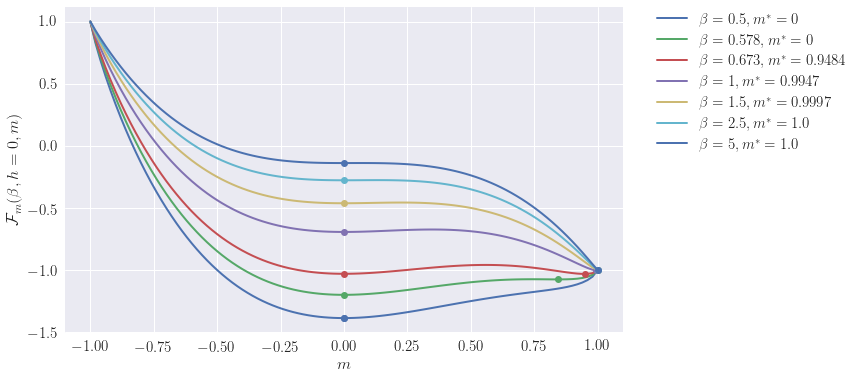

In [8]:
# Problem 1 (b)
m = np.linspace(-1,1,101)
h, beta_list = 0, [0.5, 0.578, 0.673, 1, 1.5, 2.5, 5]
colors = ['C'+str(i) for i in range(10)]
plt.figure(figsize=(10,6))
for beta, color in zip(beta_list, colors):
    plt.plot(m, Fm(beta, h, m), linewidth=2, color=color, 
             label=r'$\beta = {0}, m^* = {1}$'.format(beta, round(find_m_star(beta, h),4)))
    plt.plot(0, Fm(beta, h, 0), markersize=7, marker='o', color=color)
    root = fmin(lambda m: Fm(beta, h, m), 1, disp=False)
    plt.plot(root, Fm(beta, h, root), markersize=7, marker='o', color=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$m$')
plt.ylabel(r'$\mathcal{F}_m(\beta, h=0, m)$')
plt.savefig('hw2_1(b).pdf', bbox_inches='tight')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


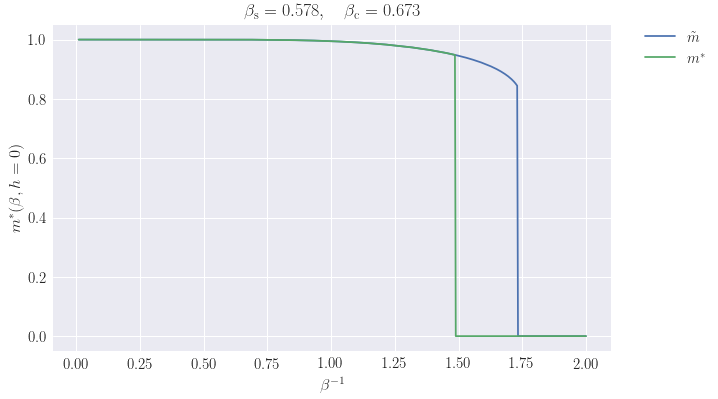

In [6]:
# Problem 1 (c)
T_list = np.concatenate((np.linspace(0.01,1.2,50), np.linspace(1.2,2,250)))
m_star = np.fromiter((find_m_star(1/T, 0) for T in T_list), float)
m_tilde = np.fromiter((fmin(lambda m: Fm(1/T, 0, m), 1, disp=False) for T in T_list), float)
beta_s = 1/T_list[np.argmax(abs(m_tilde[1:] - m_tilde[:-1]))]
beta_c = 1/T_list[np.argmax(abs(m_star[1:] - m_star[:-1]))]
plt.figure(figsize=(10,6))
plt.title(r'$\beta_{\mathrm{s}} = beta_s, \quad \beta_{\mathrm{c}} = beta_c $'
          .replace('beta_s', str(round(beta_s,4)))
          .replace('beta_c', str(round(beta_c,4))))
plt.plot(T_list, m_tilde, label=r'$\tilde{m}$')
plt.plot(T_list, m_star, label=r'$m^*$')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$\beta^{-1}$')
plt.ylabel(r'$m^*(\beta,h=0)$')
plt.savefig('hw2_1(c).pdf', bbox_inches='tight')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in log
  app.launch_new_instance()


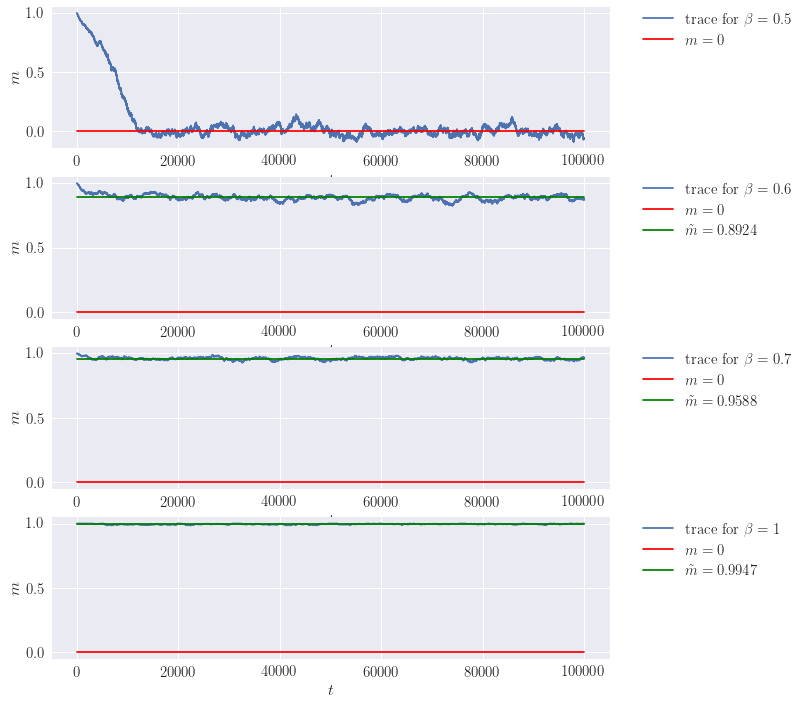

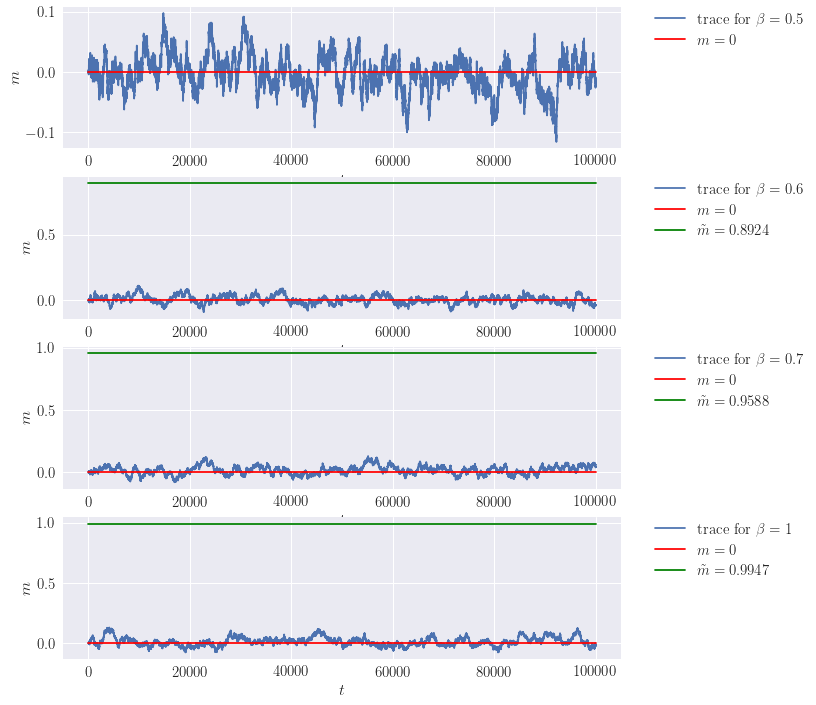

In [31]:
# Problem 1 (d)
def CW_3spin_simul(N, beta, t_max=None, S0=None):
    t_max, S = t_max or 100 * N, S0 if S0 is not None else np.ones(N)
    p_plus = lambda m: ( 1 + np.tanh(3*beta*m**2) ) / 2

    m = np.full(t_max, np.nan)
    m[0] = S.mean()
    for t in range(1, t_max):
        k, r = np.random.randint(0, N), np.random.uniform(0, 1)
        S[k] = 1 if r < p_plus(m[t-1]) else -1
        m[t] = S.mean()
    return m

N, beta_list = 1000, [0.5, 0.6, 0.7, 1]
plt.figure(figsize=(10,3*len(beta_list)))
for i, beta in enumerate(beta_list, 1):
    m = CW_3spin_simul(N, beta)
    plt.subplot(len(N_list),1,i)
    plt.plot(m, label=r'trace for $\beta = {0}$'.format(beta))
    plt.plot([0, m.size], np.array([0,0]), label=r'$m=0$', linestyle='-', color='red')
    root = fmin(lambda m: Fm(beta, h, m), 1, disp=False)[0]
    if root > 0.8:
        plt.plot([0, m.size], root * np.array([1,1]), label=r'$\tilde{m}=root$'.replace('root', str(round(root,4))), linestyle='-', color='green')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$m$')
plt.savefig('hw2_2(b)1.pdf', bbox_inches='tight')

N, beta_list = 1000, [0.5, 0.6, 0.7, 1]
plt.figure(figsize=(10,3*len(beta_list)))
for i, beta in enumerate(beta_list, 1):
    m = CW_3spin_simul(N, beta, S0=np.concatenate((np.ones(N//2), -np.ones(N//2))))
    plt.subplot(len(N_list),1,i)
    plt.plot(m, label=r'trace for $\beta = {0}$'.format(beta))
    plt.plot([0, m.size], np.array([0,0]), label=r'$m=0$', linestyle='-', color='red')
    root = fmin(lambda m: Fm(beta, h, m), 1, disp=False)[0]
    if root > 0.8:
        plt.plot([0, m.size], root * np.array([1,1]), label=r'$\tilde{m}=root$'.replace('root', str(round(root,4))), linestyle='-', color='green')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel(r'$t$')
    plt.ylabel(r'$m$')
plt.savefig('hw2_2(b)2.pdf', bbox_inches='tight')

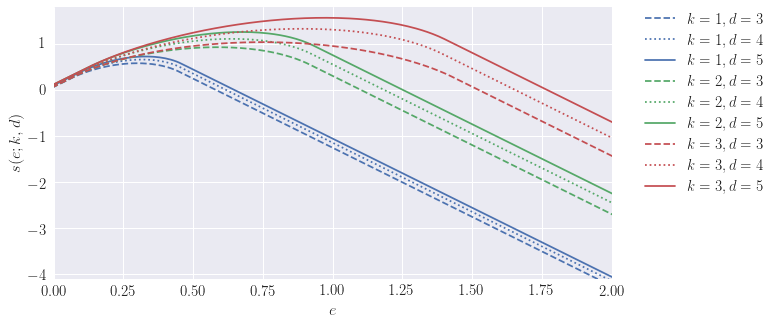

In [23]:
from scipy.special import binom
# Problem 3 (c): k-factor on d-regular
def k_factor_d_regular_BP(beta, k, d):
    h, h_old = np.ones(beta.size), np.zeros(beta.size)
    binoms = np.fromiter((binom(d-1, i) for i in range(min(k+1,d+1))), float).reshape((-1,1))
    while abs(h-h_old).max() > 1e-4:
        temp = binoms * np.vander(h, min(k+1,d+1), increasing=True).T
        h_old, h = h, np.exp(beta) * (1 - temp[-1,:] / temp.sum(axis=0))

    binoms = np.fromiter((binom(d, i) for i in range(min(k+1,d+1))), float).reshape((-1,1))
    f_Bethe = d/2*beta - d/2 * np.log(np.exp(beta)+h**2) + np.log((binoms * np.array([h**kappa for kappa in range(min(k+1,d+1))])).sum(axis=0))
    
    e = np.linspace(-d, d, beta.size).reshape((-1,1))
    se = (f_Bethe - beta * e).min(axis=1)
    return e, se

beta = np.linspace(-3,3,1001)
plt.figure(figsize=(10,5))
for d, linestyle in zip([3,4,5], ['--', ':', '-']):
    for k, color in zip([1,2,3], ['C0', 'C1', 'C2']):
        e, se = k_factor_d_regular_BP(beta, k, d)
        plt.plot(e, se, label=r'$k={0}, d={1}$'.format(k,d), color=color, linestyle=linestyle)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$e$')
plt.ylabel(r'$s(e; k, d)$')
plt.xlim((0,2))
plt.ylim((-4.1, 1.8))
plt.savefig('hw2_3(c).pdf', bbox_inches='tight')

In [ ]:
# %load k_factor_ER_simul.py
import numpy as np
import networkx as nx
from itertools import combinations
from functools import reduce
from collections import defaultdict
def BP_k_factor(G, beta, k, damp=1, T=3000, rel_tol=1e-4, report=False):
    def cal_prod(i, I):
        # \prod_{l \in I} h^{(il) \to i}
        return reduce(lambda x,y: x*y, [h[(l,i)] for l in I], 1)
    def cal_sum_kappa(j, i, kappa):
        # \sum_{I \subseteq \partial i \ j ,|I|=k} \prod_{l \in I} h^{(il) \to i}
        return sum(cal_prod(i, I) for I in combinations(set(adj_list[i])-set([j]), kappa))
    def BP_update(h):
        h_new = {}
        for j in G.nodes():
            for i in adj_list[j]:
                sum_less_k, sum_eq_k = sum(cal_sum_kappa(j, i, kappa) for kappa in range(k)), cal_sum_kappa(j, i, k)
                h_new[(j, i)] = np.exp(beta) * sum_less_k / (sum_less_k + sum_eq_k)
                h_new[(j, i)] = (1-damp) * h[(j, i)] + damp * h_new[(j, i)]
        return h_new
    def compute_f_Bethe(h):
        f = beta * len(G.edges())
        for i in G.nodes():
            f += np.log( sum(cal_sum_kappa(-1, i, kappa) for kappa in range(k+1)) )
        for i, j in G.edges():
            f -= np.log( np.exp(beta) + h[(i,j)] * h[(j,i)] )
        return f / len(G.nodes())
        
    # Initialize BP messages randomly
    adj_list, h, f_Bethe = [list(v.keys()) for k, v in sorted(G.adjacency())], {}, []
    for i, l in enumerate(adj_list):
        for j in l: h[(i,j)] = 1
    for t in range(1,T+1):   
        h = BP_update(h)
        f_Bethe.append(compute_f_Bethe(h))
        if report and t % report == 0:
            print('iteration {0}, f_Bethe = {1:.6f}'.format(t, f_Bethe[-1]))
        if t > 10 and abs((f_Bethe[-1] - f_Bethe[-10])/f_Bethe[-1]) < rel_tol:
            print('beta {0:.3f}: BP converge in {1} iteration, f_Bethe = {2:.6f}'.format(beta, t, f_Bethe[-1]))
            break
    return f_Bethe, h

# N = 1000
# result, beta = defaultdict(list), np.linspace(-3,3,101)
# for c in [3,4,5]:
#     G = nx.erdos_renyi_graph(N, c/(N-1))
#     for k in [1,2,3]:
#         print('#'*80)
#         print('k = {0}, c = {1}'.format(k, c))
#         print('#'*80)
#         for b in beta:
#             f = BP_k_factor(G, beta=b, k=k, report=100)[0]
#             result['f_Bethe_k={0}_c={1}'.format(k, c)].append(f[-1])
# np.savez('k_factor_ER_simul.npz', **result)

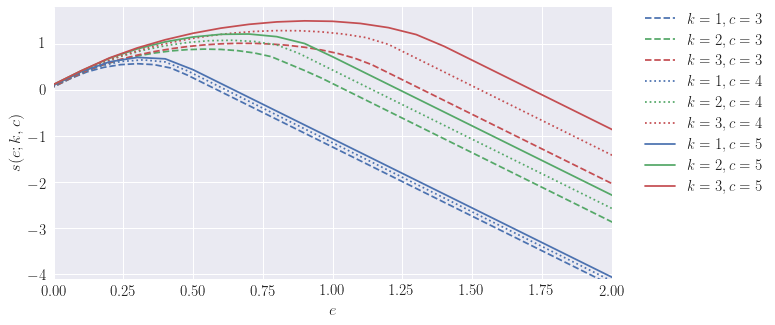

In [26]:
res = np.load('k_factor_ER_simul.npz')
beta = np.linspace(-3,3,101)
plt.figure(figsize=(10,5))
for c, linestyle in zip([3,4,5], ['--', ':', '-']):
    e = np.linspace(-c, c, beta.size).reshape((-1,1))
    for k, color in zip([1,2,3], ['C0', 'C1', 'C2']):
        se = (res['f_Bethe_k={0}_c={1}'.format(k, c)] - beta * e).min(axis=1)
        plt.plot(e, se, label=r'$k={0}, c={1}$'.format(k,c), color=color, linestyle=linestyle)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel(r'$e$')
plt.ylabel(r'$s(e; k, c)$')
plt.xlim((0,2))
plt.ylim((-4.1, 1.8))
plt.savefig('hw2_3(d).pdf', bbox_inches='tight')